# Time complexity

In [33]:
import sys
import time

sys.path.append('../')

In [34]:
from src.mc import _mc, _prob_latent

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
def calculate_time(X, pi, means, covariances):
    time_0 = time.time()
    prob_latent = _prob_latent(X=X, pi=pi, means=means, covariances=covariances)
    time_1 = time.time()
    _ = _mc(prob_latent=prob_latent, weights=None)
    time_2 = time.time()
    return time_1 - time_0, time_2 - time_1

In [38]:
def sample_X(N=1000, D=5):
    N_0 = int(N * 0.5)
    N_1 = N - N_0
    X_1 = np.random.randn(N_0, D)
    X_2 = np.random.randn(N_1, D) + np.ones(D)
    pi = np.array([0.5, 0.5])
    means = np.array([np.zeros(D), np.ones(D)])
    covariances = np.array([np.eye(D), np.eye(D)])
    return np.r_[X_1, X_2], pi, means, covariances

In [39]:
def calculate_average_time(N=1000, D=5, n_trial=10):
    time1_list = []
    time2_list = []
    for _ in range(n_trial):
        X, pi, means, covariances = sample_X(N, D)
        time1, time2 = calculate_time(X, pi, means, covariances)
        time1_list.append(time1)
        time2_list.append(time2)

    return np.mean(time1_list), np.mean(time2_list)

# Increase N

In [40]:
N_list = [10, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
D = 10

time1_list = []
time2_list = []

for N in N_list:
    time1, time2 = calculate_average_time(N, D, n_trial=10)
    time1_list.append(time1)
    time2_list.append(time2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


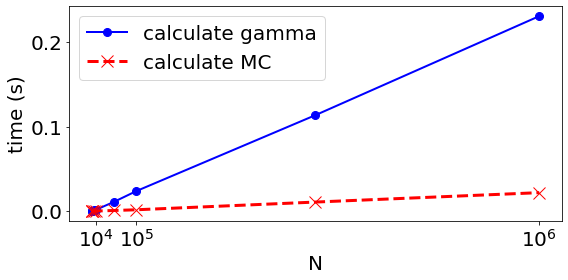

In [41]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(N_list, time1_list, marker='o', linestyle='solid', linewidth=2, color='blue', markersize=8, label='calculate gamma')
ax.plot(N_list, time2_list, marker='x', linestyle='dashed', linewidth=3, color='red', markersize=12, label='calculate MC')
ax.legend(fontsize=20)

ax.tick_params(labelsize=20)
ax.set_xticks([10000, 100000, 1000000])
ax.set_xticklabels(['$10^4$', '$10^5$', '$10^6$'])
ax.set_xlabel('N', fontsize=20)
ax.set_ylabel('time (s)', fontsize=20)
plt.tight_layout()
plt.savefig('time_N.eps')

# Increase D

In [42]:
N = 10000
D_list = [10, 50, 100, 500, 1000]

time1_list = []
time2_list = []

for D in D_list:
    time1, time2 = calculate_average_time(N, D, n_trial=10)
    time1_list.append(time1)
    time2_list.append(time2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


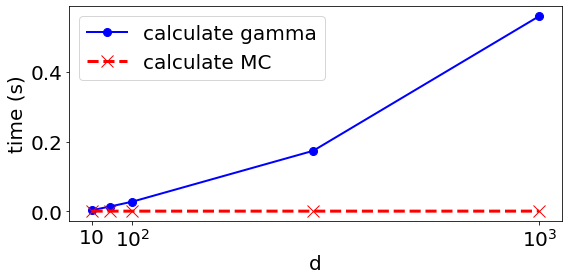

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(D_list, time1_list, marker='o', linestyle='solid', linewidth=2, color='blue', markersize=8, label='calculate gamma')
ax.plot(D_list, time2_list, marker='x', linestyle='dashed', linewidth=3, color='red', markersize=12, label='calculate MC')
ax.legend(fontsize=20)

ax.tick_params(labelsize=20)
ax.set_xticks([10, 100, 1000])
ax.set_xticklabels(['$10$', '$10^2$', '$10^3$'])
ax.set_xlabel('d', fontsize=20)
ax.set_ylabel('time (s)', fontsize=20)
plt.tight_layout()
plt.savefig('time_d.eps')